Text(0.5, 1.0, 'Transmission Spectra vs Frequency')

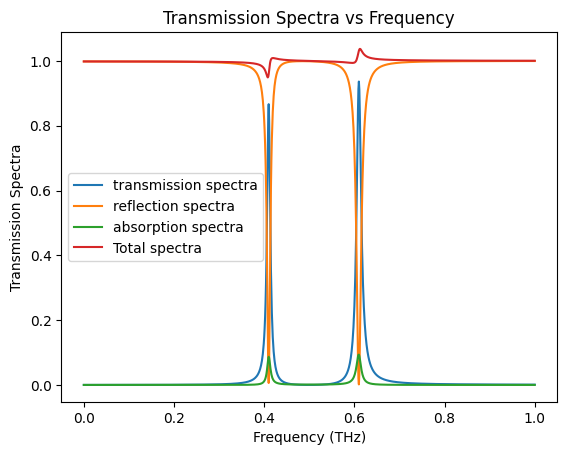

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def Hopfield_Matrix(w, wk, wc, g, Ga, Gb, Gc):
    D = g**2 / wc
    G = np.array([
        [wk - 1j * (Ga + Gc) - w + 2 * D, 1j * g, 2 * D, -1j * g],
        [-1j * g, wc - 1j * Gb - w, -1j * g, 0],
        [-2 * D, -1j * g, -wk - 1j * (Ga + Gc) - w - 2 * D, 1j * g],
        [-1j * g, 0, -1j * g, -wc - 1j * Gb - w]
    ], dtype=np.complex128)
    return G

# Physical parameters
# Angular frequency unit
THz = 1e12 * 2 * np.pi
GHz = 1e9 * 2 * np.pi

# Coupling strength and decaying rates
Gamma_A = 5 * GHz
Gamma_B = 0.5 * GHz
Gamma_C = 5 * GHz
wc = 0.5 * THz
wk = 0.5 * THz
g = 0.2 * wc

def final_M(H, au, bu):
    mu = np.matmul(au, H)
    mu = np.matmul(mu, bu)
    return mu

def Coeff_Matrix(w, wk, wc, g, Gamma_A, Gamma_B, Gamma_C):
    # Calculate parameters
    ga = np.sqrt(Gamma_A / np.pi)
    gb = np.sqrt(Gamma_B / np.pi)
    gc = np.sqrt(Gamma_C / np.pi)

    au = np.array([
        [ga, 0, ga, 0],
        [0, gb, 0, gb],
        [gc, 0, gc, 0]
    ], dtype=np.complex128)

    bu = np.array([
        [2j * Gamma_A / ga, 0, 2j * Gamma_C / gc],
        [0, 2j * Gamma_B / gb, 0],
        [2j * Gamma_A / ga, 0, 2j * Gamma_C / gc],
        [0, 2j * Gamma_B / gb, 0]
    ], dtype=np.complex128)

    G = Hopfield_Matrix(w, wk, wc, g, Gamma_A, Gamma_B, Gamma_C)
    cond = np.linalg.cond(G)
    if cond > 1e12:
        print(f"Warning: Matrix G is ill-conditioned at w={w:.4e} (cond={cond:.2e})")
    H = np.linalg.inv(G)
    M = final_M(H, au, bu)

    return M

def MATRIX_tra_spectra(w, wk, wc, g, Gamma_A, Gamma_B, Gamma_C):
    tran = []
    reflec = []
    absp = []

    for i in range(len(w)):
        M = Coeff_Matrix(w[i], wk, wc, g, Gamma_A, Gamma_B, Gamma_C)
        tr = M[2, 0]  # Adjusted for zero-based indexing
        ref = 1 + M[0, 0]
        ab = M[1, 0]
        tran.append(abs(tr) ** 2)
        reflec.append(abs(ref) ** 2)
        absp.append(abs(ab) ** 2)

    spectra = np.array([w, tran, reflec, absp])
    return spectra

# Parameters
w_dim = 1001
w = wc * np.linspace(0, 2., w_dim)

trans_spectra = []

# Plotting
plt.figure()
spectra = MATRIX_tra_spectra(w, wk, wc, g, Gamma_A, Gamma_B, Gamma_C)
plt.plot(w / THz, spectra[1], label=r'transmission spectra')
plt.plot(w / THz, spectra[2], label=r'reflection spectra')
plt.plot(w / THz, spectra[3], label=r'absorption spectra')
# plot total spectra
plt.plot(w / THz, spectra[1] + spectra[2] + spectra[3], label='Total spectra')
plt.legend()
plt.xlabel('Frequency (THz)')
plt.ylabel('Transmission Spectra')
plt.title('Transmission Spectra vs Frequency')